In [297]:
import pandas as pd
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [310]:
import dataframe_image as dfi
import matplotlib.pyplot as plt
from matplotlib import font_manager
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

C:\Users\NT551XCJ\anaconda3\Lib\site-packages\nbconvert\filters\strings.py:23: DeprecationWarning: Support for bleach <5 will be removed in a future version of nbconvert
  from nbconvert.preprocessors.sanitize import _get_default_css_sanitizer


In [318]:
tot_convenience = pd.read_csv('.\\tot_convenience.csv', sep=',')
tot_coffeeH = pd.read_csv('.\\tot_coffeeH.csv', sep=',')
tot_coffeeL = pd.read_csv('.\\tot_coffeeL.csv', sep=',')
tot_clothes = pd.read_csv('.\\tot_clothes.csv', sep=',')
tot_theater = pd.read_csv('.\\tot_theater.csv', sep=',')

In [319]:
data_list = [tot_convenience, tot_coffeeH, tot_coffeeL, tot_clothes, tot_theater]
data_name = ["conv","H","L","clo","thet"]

In [320]:
for i in data_list:
    print(len(i))

3823
1277
383
413
906


## 연관분석

#### 컬럼, 인덱스 확인

In [161]:
tot_convenience.columns

Index(['Unnamed: 0', 'idx', 'recom', 'work_StrDate', 'work_EndDate', 'workOn',
       'plus_cnt', 'minus_cnt', 'Q. 일하면서 좋았던 점/힘들었던 점을 알려주세요!',
       'Q. 사장님은 어떤 분이셨나요?', 'Q. 동료들은 어땠나요?', 'Q. 급여일 약속은 잘 지켜졌나요?',
       'Q. 급여는 만족하시나요?', 'brand', '경직된분위기예요', '근무환경쾌적해요', '동료가자주바뀌어요',
       '스펙에도움되어요', '식대따로나와요', '식사제공해줘요', '야근/주말수당챙겨줘요', '업무량조금많아요',
       '역/정류장에서가까워요', '자유로운분위기예요', '잔일도해요', '진상고객가끔있어요', '초보자도금방배워요',
       '퇴근시간칼이에요', '휴식시간가질수있어요', '가끔눈치보여요', '감정적이에요', '배울점많아요', '보너스등잘챙겨줘요',
       '세대차이느껴져요', '알바생을존중해줘요', '엄격해요', '유쾌해요', '시간,일정고려해줘요', '잔소리를좀해요',
       '친절하고인정있어요', '친한언니,형처럼편해요', '답답해요', '배울점많아요(동료)', '성비불균형있어요', '성실해요',
       '센스있어요', '쉬운일만골라해요', '유쾌하고즐거워요', '지각자주해요', '친절하고잘챙겨줘요', '텃세조금있어요',
       '훈남훈녀많아요', '힘든일함께해줘요', 'wk_dr'],
      dtype='object')

In [69]:
# 컬럼 확인~~ 
Q1 = ["경직된분위기예요","휴식시간가질수있어요"]
Q2 = ['가끔눈치보여요','친한언니,형처럼편해요']
Q3 = ['답답해요','힘든일함께해줘요']
qlist = [Q1, Q2, Q3]
for i in qlist:
    for j in i:
        print(j, ":", data.columns.get_loc(j))
    print("--------")

경직된분위기예요 : 14
휴식시간가질수있어요 : 28
--------
가끔눈치보여요 : 29
친한언니,형처럼편해요 : 40
--------
답답해요 : 41
힘든일함께해줘요 : 52
--------


In [163]:
tot_convenience.columns.get_loc("Q. 급여일 약속은 잘 지켜졌나요?")

11

### 함수

In [70]:
# 지지도(support) 데이터프레임 만들기

def spt(data,support):
    frequent = apriori(data, min_support = support, use_colnames = True)
    frequent['length'] = frequent['itemsets'].apply(lambda x : len(x))
    return frequent.sort_values('length', ascending = False) 

In [304]:
# 연관분석 시각화

def graph(data):
    G = nx.from_pandas_edgelist(data, source = 'from', target = 'to')
    
    # 한글 폰트 설정
    ko_font_location = "C:/Windows/Fonts/malgun.ttf"
    ko_font_name = font_manager.FontProperties(fname=ko_font_location).get_name()
    
    # 품목 연관 시각화
    plt.figure(figsize=(8,8)) 
    nx.draw_kamada_kawai(G)
    pos=nx.kamada_kawai_layout(G)
    nx.draw_networkx_labels(G, pos, font_family=ko_font_name, font_size=10, font_color='black')
    nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=2000, alpha=1)
    return plt.show()


In [230]:
# 셀 컬러 지정
def color_cell(x, color):
        color = f'background-color:{color}'
        return color

### 연관규칙 시각화 이미지 내보내기

In [317]:
#연관규칙 시각화 이미지 내보내기
for i in range(len(data_list)):
    for recommend in ["추천해요", "할만해요", "글쎄요"]:
        support = spt(data_list[i][data_list[i]["recom"]==recommend].iloc[:,14:53],0.15)
        support = pd.DataFrame(support)
        
        confidence = association_rules(support, metric = "confidence", min_threshold =0.15).sort_values(["confidence","support","lift"], ascending = [False, False, True])
        
        cm = sns.color_palette("mako_r", as_cmap =True)
        result = confidence.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)
        
        dfi.export(result, f'.\\Result\\assoicate_{data_name[i]}_{recommend[:2]}.png', max_cols=-1, max_rows=-1)

## 편의점

### "추천해요" 연관규칙 시각화

In [290]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support = spt(tot_convenience[tot_convenience["recom"]=="추천해요"].iloc[:,14:53],0.15)
support = pd.DataFrame(support)

confidence = association_rules(support, metric = "confidence", min_threshold =0.15).sort_values(["confidence","support","lift"], ascending = [False, False, True])

cm = sns.color_palette("mako_r", as_cmap =True)
confidence.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32,"frozenset({'시간,일정고려해줘요', '초보자도금방배워요', '친절하고인정있어요', '근무환경쾌적해요'})",frozenset({'알바생을존중해줘요'}),0.181818,0.827273,0.175325,0.964286,1.165620,0.024911,4.836364,0.173663
63,"frozenset({'시간,일정고려해줘요', '근무환경쾌적해요', '친절하고인정있어요', '자유로운분위기예요'})",frozenset({'알바생을존중해줘요'}),0.176623,0.827273,0.168831,0.955882,1.155462,0.022715,3.915152,0.163407
235,"frozenset({'근무환경쾌적해요', '친절하고인정있어요', '시간,일정고려해줘요'})",frozenset({'알바생을존중해줘요'}),0.249351,0.827273,0.236364,0.947917,1.145833,0.030083,3.316364,0.169550
92,"frozenset({'근무환경쾌적해요', '초보자도금방배워요', '친절하고인정있어요', '자유로운분위기예요'})",frozenset({'알바생을존중해줘요'}),0.171429,0.827273,0.162338,0.946970,1.144689,0.020519,3.257143,0.152552
2,"frozenset({'시간,일정고려해줘요', '초보자도금방배워요', '친절하고인정있어요', '자유로운분위기예요'})",frozenset({'알바생을존중해줘요'}),0.159740,0.827273,0.150649,0.943089,1.139998,0.018501,3.035065,0.146152
179,"frozenset({'초보자도금방배워요', '근무환경쾌적해요', '친절하고인정있어요'})",frozenset({'알바생을존중해줘요'}),0.259740,0.827273,0.244156,0.940000,1.136264,0.029280,2.878788,0.162001
431,"frozenset({'초보자도금방배워요', '친절하고인정있어요', '시간,일정고려해줘요'})",frozenset({'알바생을존중해줘요'}),0.229870,0.827273,0.215584,0.937853,1.133669,0.025419,2.779339,0.153101
672,"frozenset({'유쾌해요', '시간,일정고려해줘요'})",frozenset({'알바생을존중해줘요'}),0.176623,0.827273,0.164935,0.933824,1.128798,0.018819,2.610101,0.138578
347,"frozenset({'친절하고인정있어요', '자유로운분위기예요', '시간,일정고려해줘요'})",frozenset({'알바생을존중해줘요'}),0.215584,0.827273,0.200000,0.927711,1.121409,0.021653,2.389394,0.138019
876,"frozenset({'퇴근시간칼이에요', '근무환경쾌적해요'})",frozenset({'알바생을존중해줘요'}),0.210390,0.827273,0.194805,0.925926,1.119251,0.020756,2.331818,0.134934


In [292]:
df =pd.DataFrame(list(support[support["length"]==2]['itemsets']), columns =["from","to"])

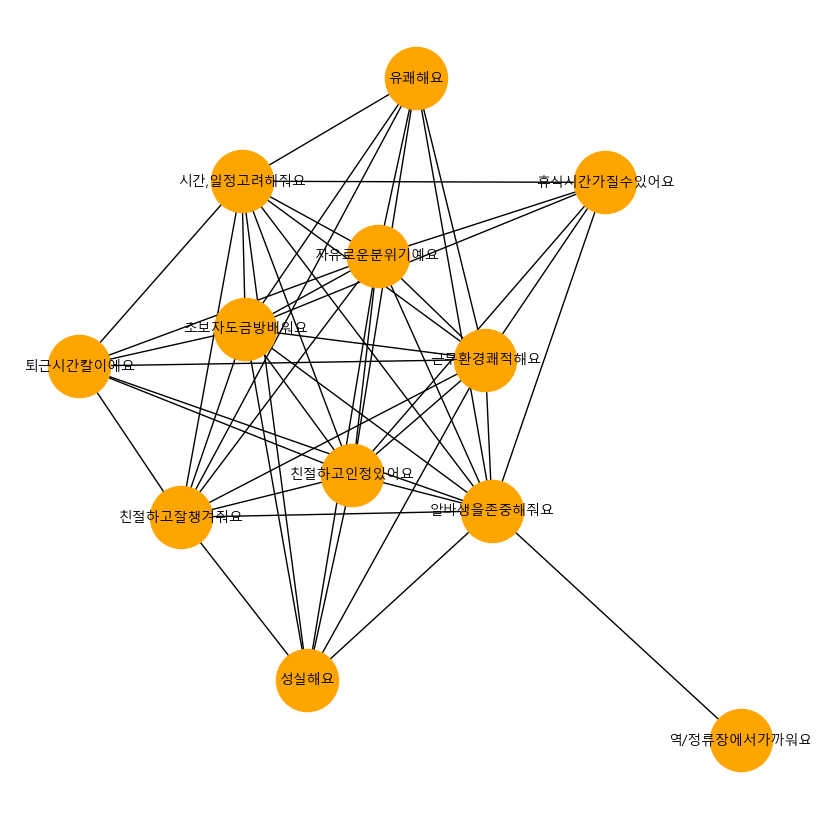

In [305]:
gp = graph(df)

### "할만해요" 연관규칙 시각화

In [249]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_2 = spt(tot_convenience[tot_convenience["recom"]=="할만해요"].iloc[:,14:53],0.15) 

support_2 = pd.DataFrame(support_2)
confidence_2 = association_rules(support_2, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_2.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,"frozenset({'근무환경쾌적해요', '친절하고잘챙겨줘요'})",frozenset({'알바생을존중해줘요'}),0.241482,0.530664,0.176746,0.731922,1.379257,0.048600,1.750745,0.362512
8,"frozenset({'근무환경쾌적해요', '자유로운분위기예요'})",frozenset({'알바생을존중해줘요'}),0.239353,0.530664,0.166099,0.693950,1.307701,0.039083,1.533527,0.309340
1,"frozenset({'알바생을존중해줘요', '친절하고잘챙겨줘요'})",frozenset({'근무환경쾌적해요'}),0.257666,0.512777,0.176746,0.685950,1.337717,0.044621,1.551421,0.340087
45,frozenset({'근무환경쾌적해요'}),frozenset({'알바생을존중해줘요'}),0.512777,0.530664,0.330068,0.643688,1.212985,0.057956,1.317203,0.360383
25,frozenset({'친절하고인정있어요'}),frozenset({'초보자도금방배워요'}),0.257666,0.514906,0.162692,0.631405,1.226252,0.030018,1.316061,0.248550
15,frozenset({'친절하고잘챙겨줘요'}),frozenset({'알바생을존중해줘요'}),0.408433,0.530664,0.257666,0.630865,1.188822,0.040925,1.271449,0.268492
7,"frozenset({'알바생을존중해줘요', '자유로운분위기예요'})",frozenset({'근무환경쾌적해요'}),0.264906,0.512777,0.166099,0.627010,1.222773,0.030261,1.306262,0.247841
44,frozenset({'알바생을존중해줘요'}),frozenset({'근무환경쾌적해요'}),0.530664,0.512777,0.330068,0.621990,1.212985,0.057956,1.288917,0.374119
13,frozenset({'친절하고잘챙겨줘요'}),frozenset({'근무환경쾌적해요'}),0.408433,0.512777,0.241482,0.591241,1.153018,0.032047,1.191957,0.224338
23,frozenset({'성실해요'}),frozenset({'초보자도금방배워요'}),0.306644,0.514906,0.176746,0.576389,1.119405,0.018853,1.145139,0.153844


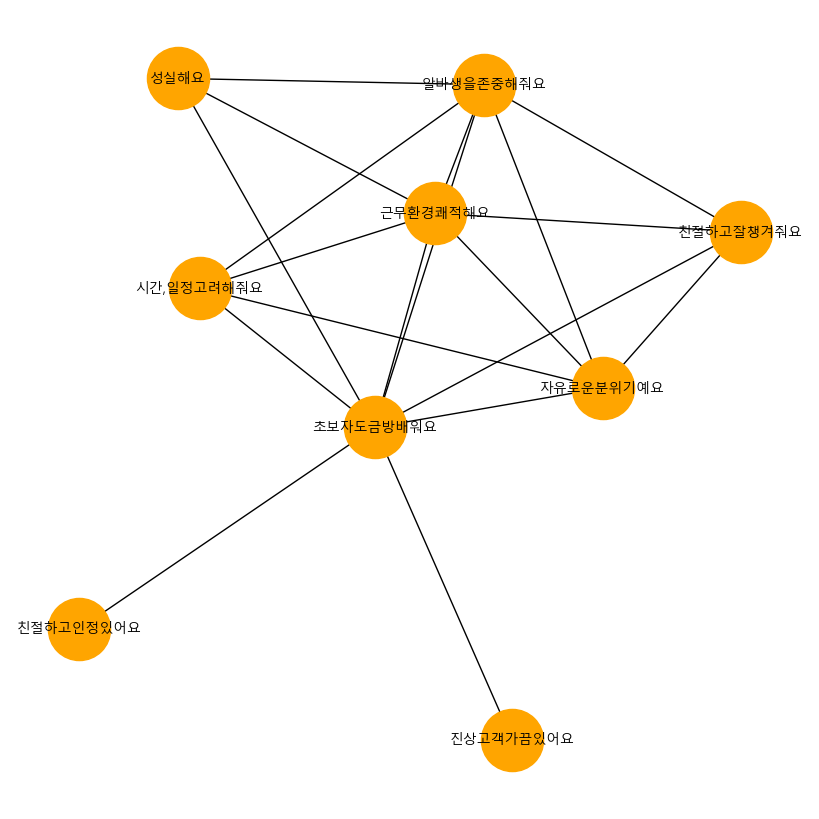

In [222]:
df2 =pd.DataFrame(list(support_2[support_2["length"]==2]['itemsets']), columns =["from","to"])
graph(df2)

### "글쎄요" 연관규칙 시각화

In [228]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_3 = spt(tot_convenience[tot_convenience["recom"]=="글쎄요"].iloc[:,14:53],0.15) 

support_3 = pd.DataFrame(support_3)
confidence_3 = association_rules(support_3, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(잔소리를좀해요),(진상고객가끔있어요),0.394326,0.486525,0.241135,0.611511,1.256895,0.049285,1.321723,0.337457
11,(가끔눈치보여요),(진상고객가끔있어요),0.395745,0.486525,0.235461,0.594982,1.222922,0.042921,1.267784,0.301671
7,(지각자주해요),(진상고객가끔있어요),0.258156,0.486525,0.150355,0.582418,1.197097,0.024755,1.229638,0.221942
8,(진상고객가끔있어요),(잔소리를좀해요),0.486525,0.394326,0.241135,0.495627,1.256895,0.049285,1.200845,0.398050
10,(진상고객가끔있어요),(가끔눈치보여요),0.486525,0.395745,0.235461,0.483965,1.222922,0.042921,1.170958,0.355006
13,(초보자도금방배워요),(진상고객가끔있어요),0.404255,0.486525,0.194326,0.480702,0.988031,-0.002354,0.988787,-0.019928
1,(잔소리를좀해요),(가끔눈치보여요),0.394326,0.395745,0.178723,0.453237,1.145277,0.022671,1.105151,0.209435
0,(가끔눈치보여요),(잔소리를좀해요),0.395745,0.394326,0.178723,0.451613,1.145277,0.022671,1.104464,0.209926
5,(가끔눈치보여요),(초보자도금방배워요),0.395745,0.404255,0.173050,0.437276,1.081683,0.013068,1.058680,0.124971
4,(초보자도금방배워요),(가끔눈치보여요),0.404255,0.395745,0.173050,0.428070,1.081683,0.013068,1.056520,0.126756


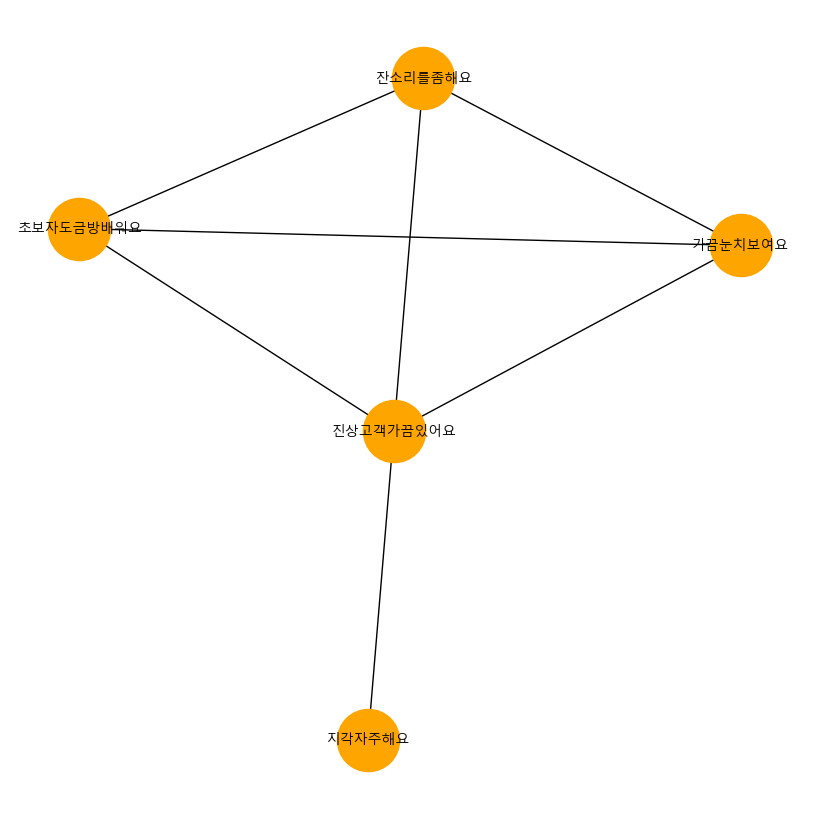

In [227]:
df3 =pd.DataFrame(list(support_3[support_3["length"]==2]['itemsets']), columns =["from","to"])
graph(df3)

## 고가형 카페

### "추천해요" 연관규칙 시각화

In [253]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_1 = spt(tot_coffeeH[tot_coffeeH["recom"]=="추천해요"].iloc[:,14:53],0.15) 

support_1 = pd.DataFrame(suppoㅁrt_1)
confidence_1 = association_rules(support_1, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_1.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
189,"frozenset({'알바생을존중해줘요', '친절하고인정있어요', '성실해요'})",frozenset({'근무환경쾌적해요'}),0.169753,0.765432,0.169753,1.000000,1.306452,0.039819,inf,0.282528
58,"frozenset({'알바생을존중해줘요', '친절하고잘챙겨줘요', '친절하고인정있어요', '자유로운분위기예요'})",frozenset({'근무환경쾌적해요'}),0.163580,0.765432,0.157407,0.962264,1.257152,0.032198,6.216049,0.244555
511,"frozenset({'친절하고인정있어요', '성실해요', '시간,일정고려해줘요'})",frozenset({'근무환경쾌적해요'}),0.157407,0.765432,0.151235,0.960784,1.255218,0.030750,5.981481,0.241310
774,"frozenset({'친절하고잘챙겨줘요', '친절하고인정있어요', '성실해요'})",frozenset({'근무환경쾌적해요'}),0.157407,0.765432,0.151235,0.960784,1.255218,0.030750,5.981481,0.241310
1351,"frozenset({'휴식시간가질수있어요', '친절하고인정있어요'})",frozenset({'근무환경쾌적해요'}),0.157407,0.765432,0.151235,0.960784,1.255218,0.030750,5.981481,0.241310
954,"frozenset({'친절하고인정있어요', '성실해요'})",frozenset({'근무환경쾌적해요'}),0.194444,0.765432,0.185185,0.952381,1.244240,0.036351,4.925926,0.243678
245,"frozenset({'알바생을존중해줘요', '성실해요', '시간,일정고려해줘요'})",frozenset({'근무환경쾌적해요'}),0.191358,0.765432,0.182099,0.951613,1.243236,0.035627,4.847737,0.241946
29,"frozenset({'알바생을존중해줘요', '친절하고잘챙겨줘요', '친절하고인정있어요', '시간,일정고려해줘요'})",frozenset({'근무환경쾌적해요'}),0.188272,0.765432,0.179012,0.950820,1.242200,0.034903,4.769547,0.240199
470,"frozenset({'친절하고잘챙겨줘요', '친절하고인정있어요', '자유로운분위기예요'})",frozenset({'근무환경쾌적해요'}),0.188272,0.765432,0.179012,0.950820,1.242200,0.034903,4.769547,0.240199
161,"frozenset({'알바생을존중해줘요', '친절하고잘챙겨줘요', '친절하고인정있어요'})",frozenset({'근무환경쾌적해요'}),0.243827,0.765432,0.231481,0.949367,1.240302,0.044848,4.632716,0.256218


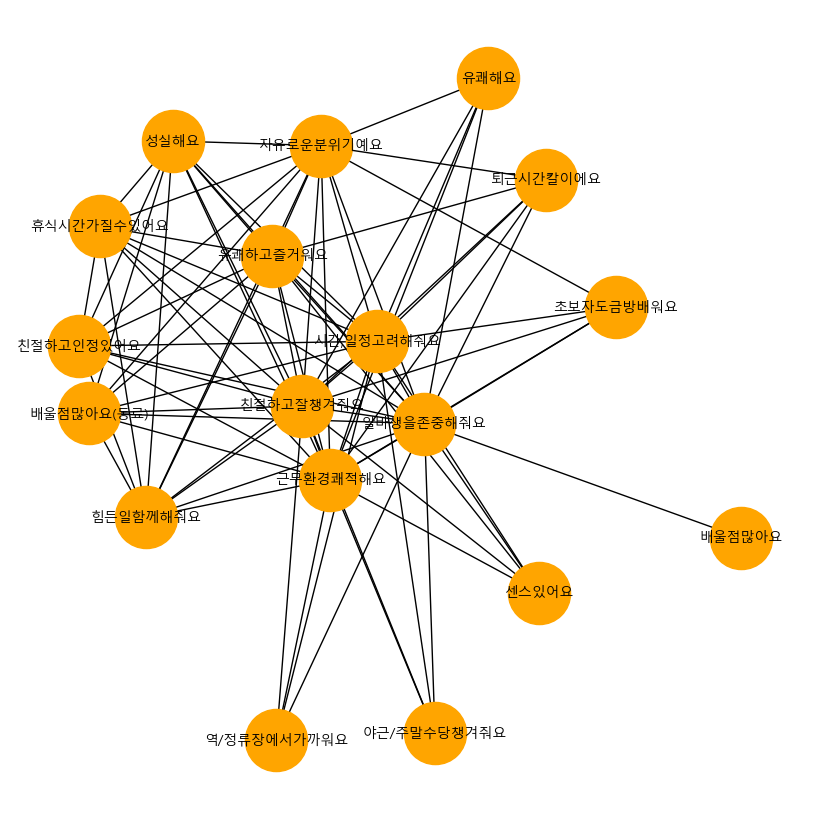

In [252]:
df1 =pd.DataFrame(list(support_1[support_1["length"]==2]['itemsets']), columns =["from","to"])
graph(df1)

### "할만해요" 연관규칙 시각화

In [254]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_2 = spt(tot_coffeeH[tot_coffeeH["recom"]=="할만해요"].iloc[:,14:53],0.15) 

support_2 = pd.DataFrame(support_2)
confidence_2 = association_rules(support_2, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_2.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,"frozenset({'알바생을존중해줘요', '친절하고잘챙겨줘요'})",frozenset({'근무환경쾌적해요'}),0.253237,0.553957,0.192806,0.761364,1.374410,0.052523,1.869133,0.364795
24,frozenset({'알바생을존중해줘요'}),frozenset({'근무환경쾌적해요'}),0.356835,0.553957,0.264748,0.741935,1.339338,0.067077,1.728417,0.393931
0,"frozenset({'알바생을존중해줘요', '근무환경쾌적해요'})",frozenset({'친절하고잘챙겨줘요'}),0.264748,0.581295,0.192806,0.728261,1.252825,0.038909,1.540835,0.274469
8,frozenset({'알바생을존중해줘요'}),frozenset({'친절하고잘챙겨줘요'}),0.356835,0.581295,0.253237,0.709677,1.220856,0.045811,1.442206,0.281269
15,frozenset({'자유로운분위기예요'}),frozenset({'친절하고잘챙겨줘요'}),0.326619,0.581295,0.210072,0.643172,1.106447,0.020210,1.173408,0.142870
16,frozenset({'근무환경쾌적해요'}),frozenset({'친절하고잘챙겨줘요'}),0.553957,0.581295,0.353957,0.638961,1.099203,0.031945,1.159723,0.202334
17,frozenset({'친절하고잘챙겨줘요'}),frozenset({'근무환경쾌적해요'}),0.581295,0.553957,0.353957,0.608911,1.099203,0.031945,1.140515,0.215545
10,frozenset({'휴식시간가질수있어요'}),frozenset({'친절하고잘챙겨줘요'}),0.282014,0.581295,0.169784,0.602041,1.035689,0.005851,1.052131,0.047994
23,"frozenset({'시간,일정고려해줘요'})",frozenset({'근무환경쾌적해요'}),0.375540,0.553957,0.224460,0.597701,1.078967,0.016428,1.108736,0.117201
13,frozenset({'초보자도금방배워요'}),frozenset({'친절하고잘챙겨줘요'}),0.270504,0.581295,0.161151,0.595745,1.024858,0.003909,1.035744,0.033249


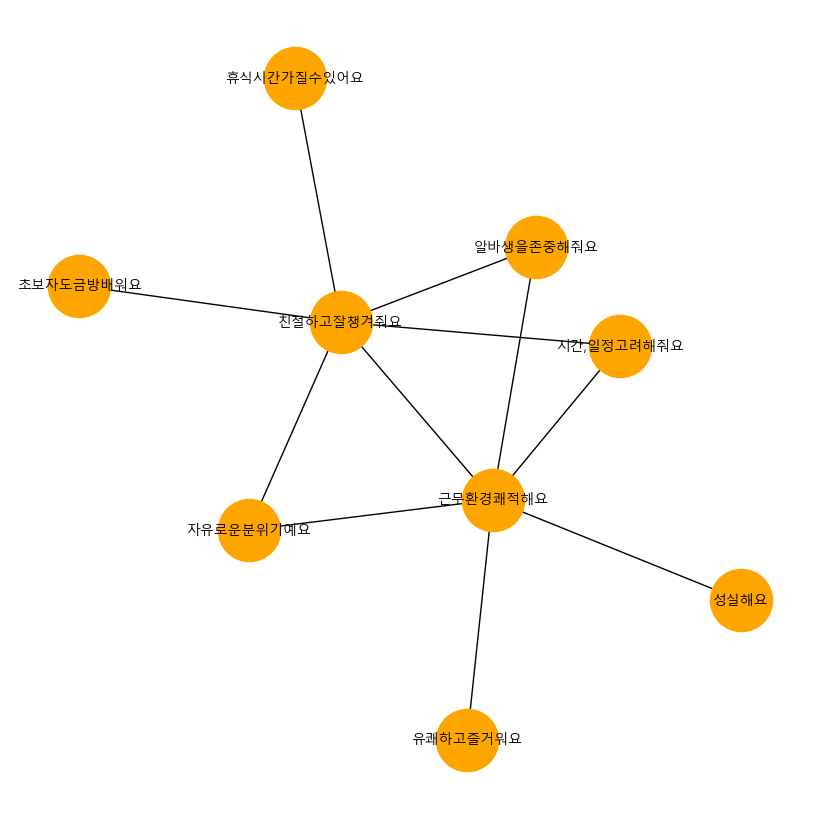

In [255]:
df2 =pd.DataFrame(list(support_2[support_2["length"]==2]['itemsets']), columns =["from","to"])
graph(df2)

### "글쎄요" 연관규칙 시각화

In [257]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_3 = spt(tot_coffeeH[tot_coffeeH["recom"]=="글쎄요"].iloc[:,14:53],0.15) 

support_3 = pd.DataFrame(support_3)
confidence_3 = association_rules(support_3, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_3.iloc[:15,:]ㅊ.style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,"frozenset({'업무량조금많아요', '잔일도해요'})",frozenset({'가끔눈치보여요'}),0.209302,0.496124,0.158915,0.759259,1.530382,0.055075,2.093023,0.438307
16,frozenset({'엄격해요'}),frozenset({'잔소리를좀해요'}),0.220930,0.465116,0.162791,0.736842,1.584211,0.060032,2.032558,0.473348
8,"frozenset({'잔일도해요', '가끔눈치보여요'})",frozenset({'업무량조금많아요'}),0.217054,0.496124,0.158915,0.732143,1.475725,0.051229,1.881137,0.411736
30,frozenset({'잔일도해요'}),frozenset({'가끔눈치보여요'}),0.317829,0.496124,0.217054,0.682927,1.376524,0.059371,1.589147,0.400974
13,frozenset({'잔일도해요'}),frozenset({'업무량조금많아요'}),0.317829,0.496124,0.209302,0.658537,1.327363,0.051619,1.475637,0.361532
1,"frozenset({'업무량조금많아요', '잔소리를좀해요'})",frozenset({'가끔눈치보여요'}),0.259690,0.496124,0.162791,0.626866,1.263526,0.033952,1.350388,0.281725
2,"frozenset({'가끔눈치보여요', '잔소리를좀해요'})",frozenset({'업무량조금많아요'}),0.259690,0.496124,0.162791,0.626866,1.263526,0.033952,1.350388,0.281725
33,frozenset({'텃세조금있어요'}),frozenset({'업무량조금많아요'}),0.310078,0.496124,0.186047,0.600000,1.209375,0.032210,1.259690,0.250936
44,frozenset({'경직된분위기예요'}),frozenset({'가끔눈치보여요'}),0.255814,0.496124,0.151163,0.590909,1.191051,0.024247,1.231697,0.215545
38,frozenset({'업무량조금많아요'}),frozenset({'가끔눈치보여요'}),0.496124,0.496124,0.290698,0.585938,1.181030,0.044559,1.216908,0.304205


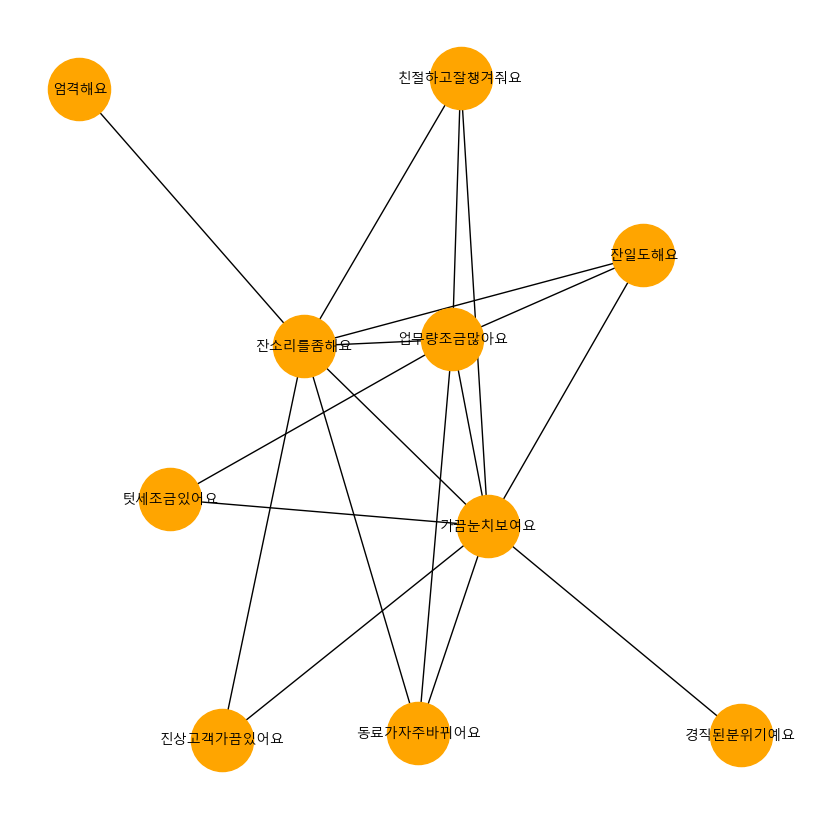

In [258]:
df3 =pd.DataFrame(list(support_3[support_3["length"]==2]['itemsets']), columns =["from","to"])
graph(df3)

## 저가형 카페

### "추천해요" 연관규칙 시각화

In [259]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_1 = spt(tot_coffeeL[tot_coffeeL["recom"]=="추천해요"].iloc[:,14:53],0.15) 

support_1 = pd.DataFrame(support_1)
confidence_1 = association_rules(support_1, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_1.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3468,"frozenset({'친한언니,형처럼편해요'})",frozenset({'알바생을존중해줘요'}),0.219298,0.763158,0.219298,1.000000,1.310345,0.051939,inf,0.303371
2880,"frozenset({'친한언니,형처럼편해요', '근무환경쾌적해요'})",frozenset({'알바생을존중해줘요'}),0.184211,0.763158,0.184211,1.000000,1.310345,0.043629,inf,0.290323
2583,"frozenset({'친한언니,형처럼편해요', '친절하고인정있어요'})",frozenset({'알바생을존중해줘요'}),0.175439,0.763158,0.175439,1.000000,1.310345,0.041551,inf,0.287234
2673,"frozenset({'친한언니,형처럼편해요', '친절하고잘챙겨줘요'})",frozenset({'알바생을존중해줘요'}),0.175439,0.763158,0.175439,1.000000,1.310345,0.041551,inf,0.287234
3299,"frozenset({'친한언니,형처럼편해요', '자유로운분위기예요'})",frozenset({'알바생을존중해줘요'}),0.166667,0.763158,0.166667,1.000000,1.310345,0.039474,inf,0.284211
2608,"frozenset({'친한언니,형처럼편해요', '시간,일정고려해줘요'})",frozenset({'알바생을존중해줘요'}),0.157895,0.763158,0.157895,1.000000,1.310345,0.037396,inf,0.281250
811,"frozenset({'유쾌하고즐거워요', '친절하고잘챙겨줘요', '친절하고인정있어요', '시간,일정고려해줘요'})",frozenset({'자유로운분위기예요'}),0.210526,0.684211,0.201754,0.958333,1.400641,0.057710,7.578947,0.362319
2965,"frozenset({'근무환경쾌적해요', '역/정류장에서가까워요'})",frozenset({'알바생을존중해줘요'}),0.192982,0.763158,0.184211,0.954545,1.250784,0.036934,5.210526,0.248447
1760,"frozenset({'유쾌하고즐거워요', '근무환경쾌적해요', '초보자도금방배워요'})",frozenset({'알바생을존중해줘요'}),0.184211,0.763158,0.175439,0.952381,1.247947,0.034857,4.973684,0.243548
1345,"frozenset({'친절하고인정있어요', '역/정류장에서가까워요', '시간,일정고려해줘요'})",frozenset({'자유로운분위기예요'}),0.184211,0.684211,0.175439,0.952381,1.391941,0.049400,6.631579,0.345161


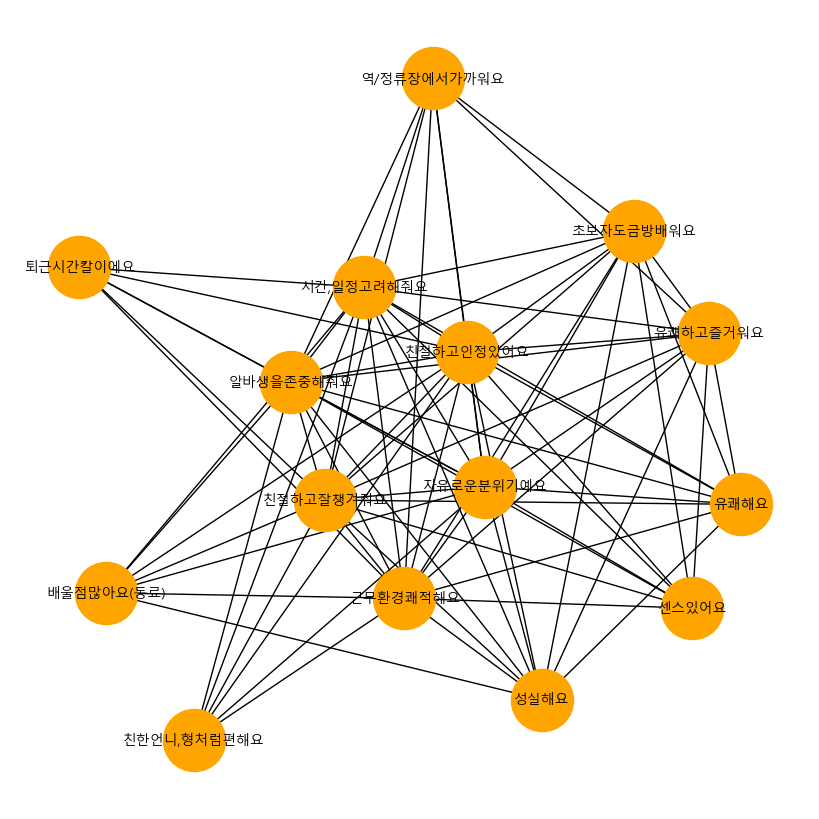

In [260]:
df1 =pd.DataFrame(list(support_1[support_1["length"]==2]['itemsets']), columns =["from","to"])
graph(df1)

### "할만해요" 연관규칙 시각화

In [270]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_2 = spt(tot_coffeeL[tot_coffeeL["recom"]=="할만해요"].iloc[:,14:53],0.15) 

support_2 = pd.DataFrame(support_2)
confidence_2 = association_rules(support_2, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_2.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,frozenset({'알바생을존중해줘요'}),frozenset({'친절하고잘챙겨줘요'}),0.363636,0.568182,0.255682,0.703125,1.237500,0.049070,1.454545,0.301587
0,"frozenset({'알바생을존중해줘요', '근무환경쾌적해요'})",frozenset({'친절하고잘챙겨줘요'}),0.227273,0.568182,0.159091,0.700000,1.232000,0.029959,1.439394,0.243697
35,"frozenset({'시간,일정고려해줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.363636,0.568182,0.238636,0.656250,1.155000,0.032025,1.256198,0.210884
27,frozenset({'초보자도금방배워요'}),frozenset({'친절하고잘챙겨줘요'}),0.482955,0.568182,0.312500,0.647059,1.138824,0.038094,1.223485,0.235764
37,frozenset({'성실해요'}),frozenset({'친절하고잘챙겨줘요'}),0.272727,0.568182,0.176136,0.645833,1.136667,0.021178,1.219251,0.165323
24,frozenset({'근무환경쾌적해요'}),frozenset({'친절하고잘챙겨줘요'}),0.397727,0.568182,0.255682,0.642857,1.131429,0.029700,1.209091,0.192872
48,frozenset({'알바생을존중해줘요'}),frozenset({'근무환경쾌적해요'}),0.363636,0.397727,0.227273,0.625000,1.571429,0.082645,1.606061,0.571429
1,"frozenset({'알바생을존중해줘요', '친절하고잘챙겨줘요'})",frozenset({'근무환경쾌적해요'}),0.255682,0.397727,0.159091,0.622222,1.564444,0.057399,1.594251,0.484733
2,"frozenset({'근무환경쾌적해요', '친절하고잘챙겨줘요'})",frozenset({'알바생을존중해줘요'}),0.255682,0.363636,0.159091,0.622222,1.711111,0.066116,1.684492,0.558342
14,frozenset({'유쾌하고즐거워요'}),frozenset({'자유로운분위기예요'}),0.346591,0.443182,0.204545,0.590164,1.331652,0.050943,1.358636,0.381159


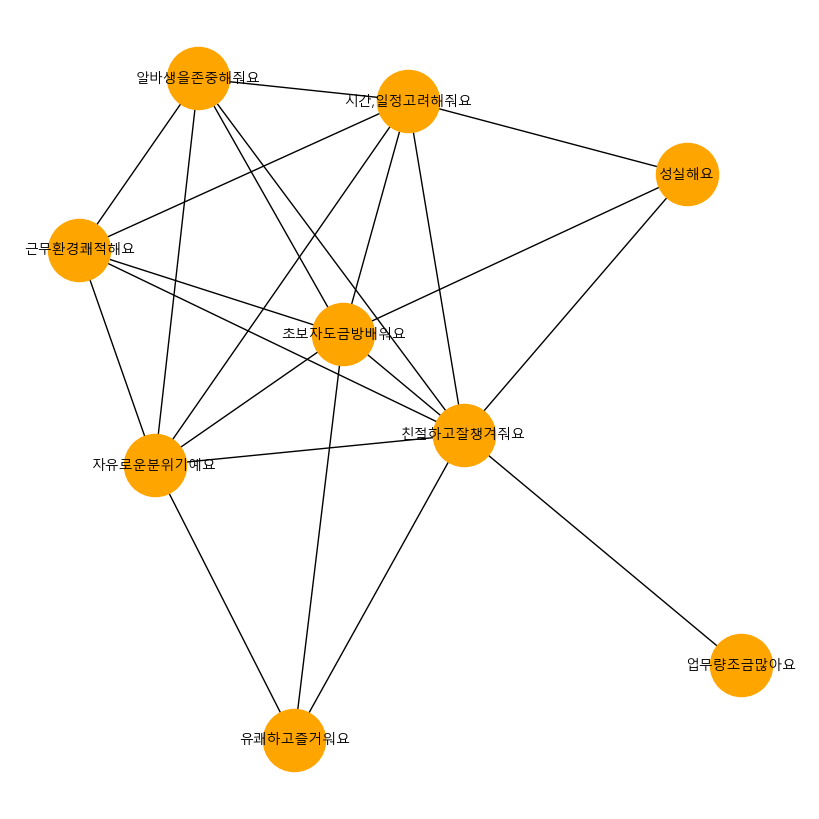

In [271]:
df2 =pd.DataFrame(list(support_2[support_2["length"]==2]['itemsets']), columns =["from","to"])
graph(df2)

### "글쎄요" 연관규칙 시각화

In [272]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_3 = spt(tot_coffeeL[tot_coffeeL["recom"]=="글쎄요"].iloc[:,14:53],0.15) 

support_3 = pd.DataFrame(support_3)
confidence_3 = association_rules(support_3, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_3.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
489,"frozenset({'감정적이에요', '잔소리를좀해요'})",frozenset({'가끔눈치보여요'}),0.247312,0.741935,0.247312,1.000000,1.347826,0.063822,inf,0.342857
513,"frozenset({'진상고객가끔있어요', '잔소리를좀해요'})",frozenset({'가끔눈치보여요'}),0.204301,0.741935,0.204301,1.000000,1.347826,0.052723,inf,0.324324
634,frozenset({'경직된분위기예요'}),frozenset({'가끔눈치보여요'}),0.204301,0.741935,0.204301,1.000000,1.347826,0.052723,inf,0.324324
31,"frozenset({'업무량조금많아요', '감정적이에요', '잔소리를좀해요'})",frozenset({'가끔눈치보여요'}),0.172043,0.741935,0.172043,1.000000,1.347826,0.044398,inf,0.311688
214,"frozenset({'감정적이에요', '엄격해요', '잔소리를좀해요'})",frozenset({'가끔눈치보여요'}),0.172043,0.741935,0.172043,1.000000,1.347826,0.044398,inf,0.311688
495,"frozenset({'감정적이에요', '엄격해요'})",frozenset({'가끔눈치보여요'}),0.172043,0.741935,0.172043,1.000000,1.347826,0.044398,inf,0.311688
579,"frozenset({'경직된분위기예요', '잔소리를좀해요'})",frozenset({'가끔눈치보여요'}),0.172043,0.741935,0.172043,1.000000,1.347826,0.044398,inf,0.311688
212,"frozenset({'감정적이에요', '가끔눈치보여요', '엄격해요'})",frozenset({'잔소리를좀해요'}),0.172043,0.537634,0.172043,1.000000,1.860000,0.079547,inf,0.558442
452,"frozenset({'감정적이에요', '엄격해요'})",frozenset({'잔소리를좀해요'}),0.172043,0.537634,0.172043,1.000000,1.860000,0.079547,inf,0.558442
217,"frozenset({'감정적이에요', '엄격해요'})","frozenset({'가끔눈치보여요', '잔소리를좀해요'})",0.172043,0.451613,0.172043,1.000000,2.214286,0.094346,inf,0.662338


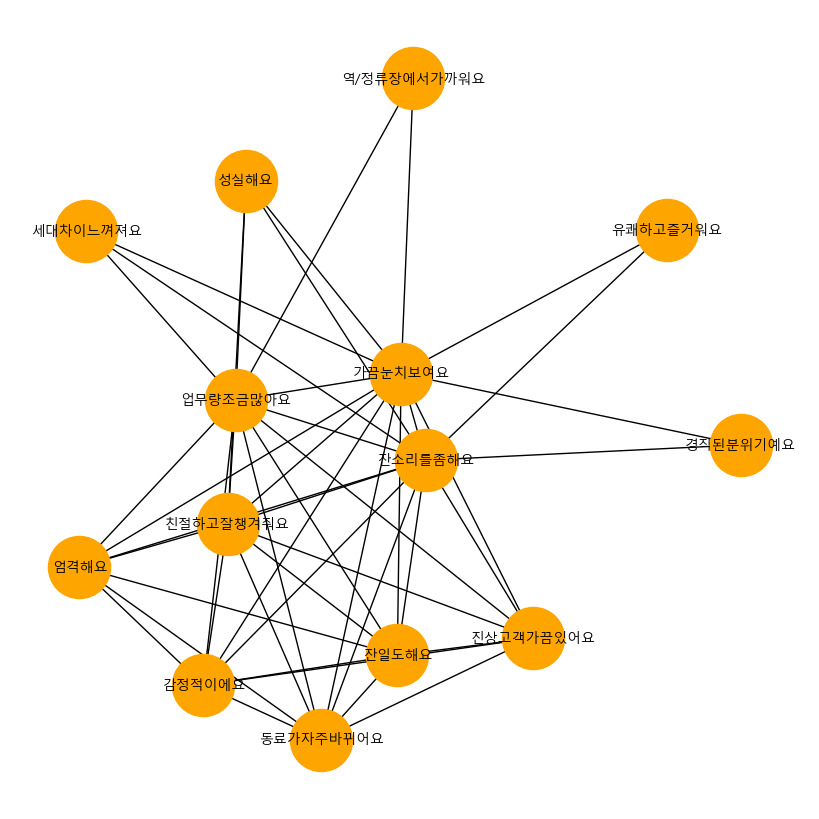

In [273]:
df3 =pd.DataFrame(list(support_3[support_3["length"]==2]['itemsets']), columns =["from","to"])
graph(df3)

## spa 브랜드

### "추천해요" 연관규칙 시각화

In [274]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_1 = spt(tot_clothes[tot_clothes["recom"]=="추천해요"].iloc[:,14:53],0.15) 

support_1 = pd.DataFrame(support_1)
confidence_1 = association_rules(support_1, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_1.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
419,"frozenset({'힘든일함께해줘요', '친절하고잘챙겨줘요'})",frozenset({'근무환경쾌적해요'}),0.222222,0.730159,0.222222,1.000000,1.369565,0.059965,inf,0.346939
140,"frozenset({'시간,일정고려해줘요', '힘든일함께해줘요', '근무환경쾌적해요'})",frozenset({'친절하고잘챙겨줘요'}),0.190476,0.793651,0.190476,1.000000,1.260000,0.039305,inf,0.254902
317,"frozenset({'힘든일함께해줘요', '시간,일정고려해줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.190476,0.793651,0.190476,1.000000,1.260000,0.039305,inf,0.254902
142,"frozenset({'힘든일함께해줘요', '친절하고잘챙겨줘요', '시간,일정고려해줘요'})",frozenset({'근무환경쾌적해요'}),0.190476,0.730159,0.190476,1.000000,1.369565,0.051398,inf,0.333333
293,"frozenset({'힘든일함께해줘요', '시간,일정고려해줘요'})",frozenset({'근무환경쾌적해요'}),0.190476,0.730159,0.190476,1.000000,1.369565,0.051398,inf,0.333333
485,frozenset({'센스있어요'}),frozenset({'근무환경쾌적해요'}),0.190476,0.730159,0.190476,1.000000,1.369565,0.051398,inf,0.333333
145,"frozenset({'힘든일함께해줘요', '시간,일정고려해줘요'})","frozenset({'근무환경쾌적해요', '친절하고잘챙겨줘요'})",0.190476,0.603175,0.190476,1.000000,1.657895,0.075586,inf,0.490196
126,"frozenset({'유쾌하고즐거워요', '근무환경쾌적해요', '시간,일정고려해줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.174603,0.793651,0.174603,1.000000,1.260000,0.036029,inf,0.250000
114,"frozenset({'친절하고잘챙겨줘요', '성실해요', '시간,일정고려해줘요'})",frozenset({'근무환경쾌적해요'}),0.158730,0.730159,0.158730,1.000000,1.369565,0.042832,inf,0.320755
190,"frozenset({'알바생을존중해줘요', '힘든일함께해줘요'})",frozenset({'근무환경쾌적해요'}),0.158730,0.730159,0.158730,1.000000,1.369565,0.042832,inf,0.320755


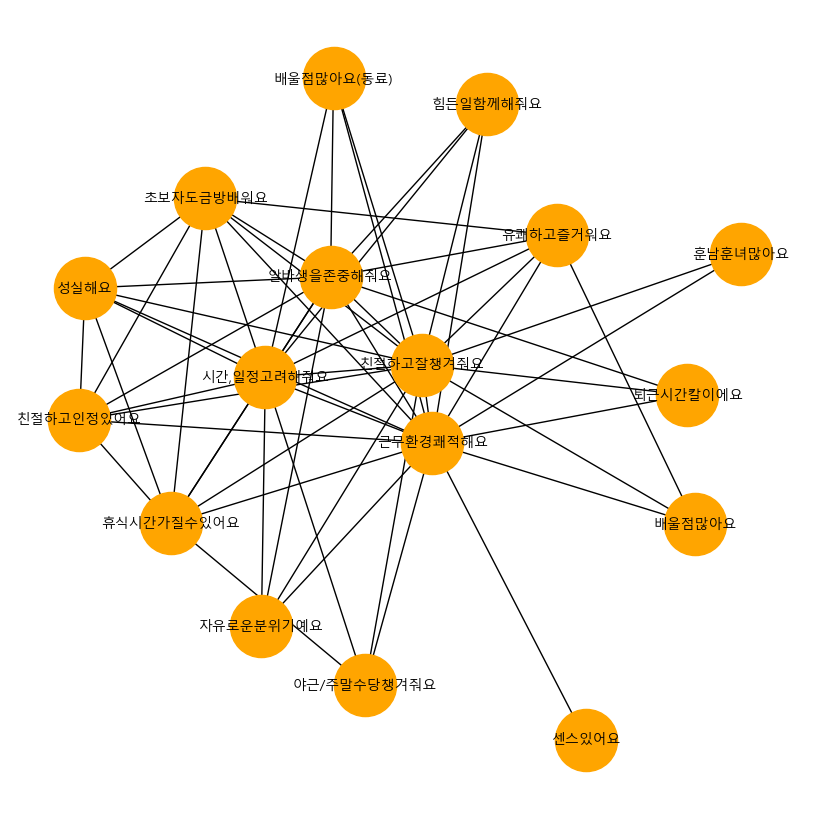

In [275]:
df1 =pd.DataFrame(list(support_1[support_1["length"]==2]['itemsets']), columns =["from","to"])
graph(df1)

### "할만해요" 연관규칙 시각화

In [277]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_2 = spt(tot_clothes[tot_clothes["recom"]=="할만해요"].iloc[:,14:53],0.15) 

support_2 = pd.DataFrame(support_2)
confidence_2 = association_rules(support_2, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_2.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,frozenset({'엄격해요'}),frozenset({'업무량조금많아요'}),0.228682,0.461240,0.174419,0.762712,1.653611,0.068941,2.270487,0.512451
1,"frozenset({'휴식시간가질수있어요', '시간,일정고려해줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.205426,0.562016,0.151163,0.735849,1.309304,0.035710,1.658084,0.297311
32,frozenset({'유쾌하고즐거워요'}),frozenset({'친절하고잘챙겨줘요'}),0.236434,0.562016,0.162791,0.688525,1.225099,0.029911,1.406161,0.240633
24,frozenset({'휴식시간가질수있어요'}),frozenset({'친절하고잘챙겨줘요'}),0.391473,0.562016,0.263566,0.673267,1.197952,0.043552,1.340498,0.271544
11,frozenset({'야근/주말수당챙겨줘요'}),frozenset({'친절하고잘챙겨줘요'}),0.236434,0.562016,0.158915,0.672131,1.195930,0.026035,1.335853,0.214560
8,frozenset({'근무환경쾌적해요'}),frozenset({'친절하고잘챙겨줘요'}),0.271318,0.562016,0.178295,0.657143,1.169261,0.025810,1.277455,0.198659
28,frozenset({'알바생을존중해줘요'}),frozenset({'친절하고잘챙겨줘요'}),0.298450,0.562016,0.189922,0.636364,1.132288,0.022189,1.204457,0.166535
7,frozenset({'텃세조금있어요'}),frozenset({'업무량조금많아요'}),0.244186,0.461240,0.151163,0.619048,1.342137,0.038534,1.414244,0.337278
2,"frozenset({'친절하고잘챙겨줘요', '시간,일정고려해줘요'})",frozenset({'휴식시간가질수있어요'}),0.244186,0.391473,0.151163,0.619048,1.581330,0.055571,1.597384,0.486391
31,"frozenset({'시간,일정고려해줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.395349,0.562016,0.244186,0.617647,1.098986,0.021994,1.145498,0.148962


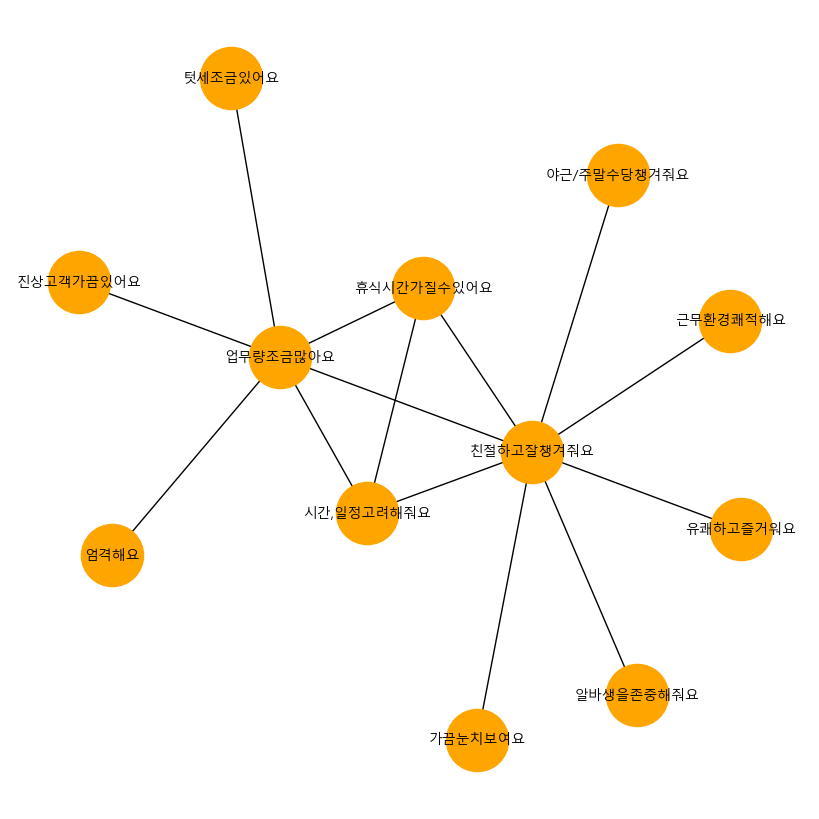

In [278]:
df2 =pd.DataFrame(list(support_2[support_2["length"]==2]['itemsets']), columns =["from","to"])
graph(df2)

### "글쎄요" 연관규칙 시각화

In [308]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_3 = spt(tot_clothes[tot_clothes["recom"]=="글쎄요"].iloc[:,14:53],0.15) 

support_3 = pd.DataFrame(support_3)
confidence_3 = association_rules(support_3, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
temp = confidence_3.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)
temp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
72,"frozenset({'진상고객가끔있어요', '가끔눈치보여요'})",frozenset({'업무량조금많아요'}),0.184783,0.706522,0.163043,0.882353,1.248869,0.032491,2.494565,0.244444
67,"frozenset({'경직된분위기예요', '가끔눈치보여요'})",frozenset({'잔일도해요'}),0.184783,0.413043,0.163043,0.882353,2.136223,0.086720,4.989130,0.652444
175,frozenset({'동료가자주바뀌어요'}),frozenset({'업무량조금많아요'}),0.282609,0.706522,0.239130,0.846154,1.197633,0.039461,1.907609,0.230028
150,frozenset({'성비불균형있어요'}),frozenset({'텃세조금있어요'}),0.206522,0.565217,0.173913,0.842105,1.489879,0.057183,2.753623,0.414384
189,frozenset({'성실해요'}),frozenset({'업무량조금많아요'}),0.195652,0.706522,0.163043,0.833333,1.179487,0.024811,1.760870,0.189189
92,"frozenset({'가끔눈치보여요', '잔소리를좀해요'})",frozenset({'업무량조금많아요'}),0.184783,0.706522,0.152174,0.823529,1.165611,0.021621,1.663043,0.174286
121,"frozenset({'진상고객가끔있어요', '엄격해요'})",frozenset({'업무량조금많아요'}),0.184783,0.706522,0.152174,0.823529,1.165611,0.021621,1.663043,0.174286
42,"frozenset({'경직된분위기예요', '가끔눈치보여요'})",frozenset({'엄격해요'}),0.184783,0.391304,0.152174,0.823529,2.104575,0.079868,3.449275,0.643810
86,"frozenset({'가끔눈치보여요', '엄격해요'})",frozenset({'업무량조금많아요'}),0.228261,0.706522,0.184783,0.809524,1.145788,0.023511,1.540761,0.164872
180,frozenset({'휴식시간가질수있어요'}),frozenset({'업무량조금많아요'}),0.228261,0.706522,0.184783,0.809524,1.145788,0.023511,1.540761,0.164872


In [313]:
dfi.export(temp, '.\\spa_bad.png', max_cols=-1, max_rows=-1)

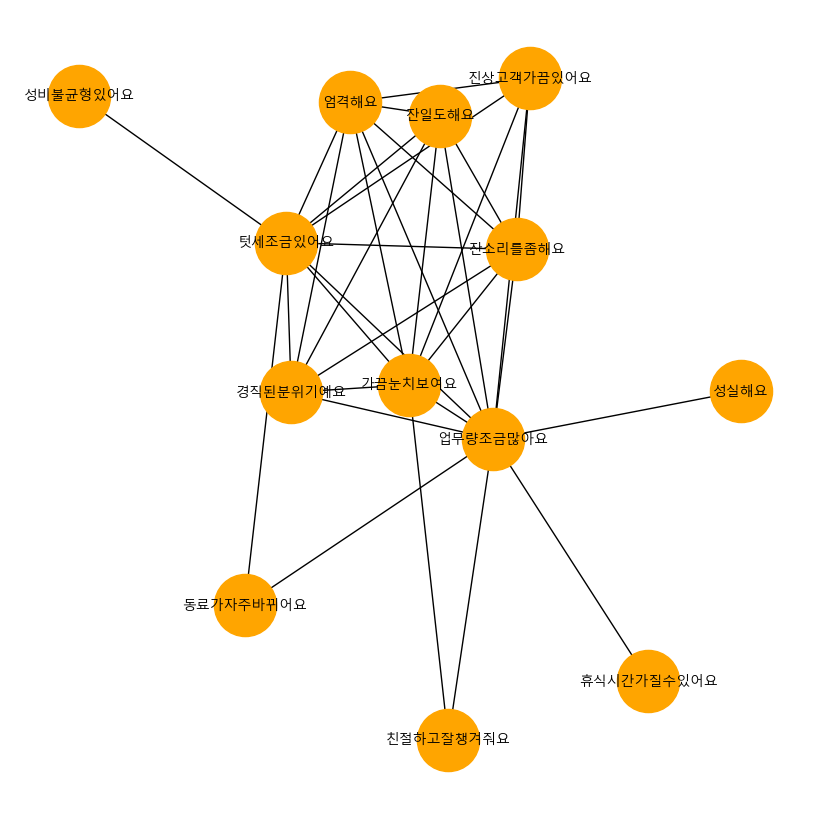

In [281]:
df3 =pd.DataFrame(list(support_3[support_3["length"]==2]['itemsets']), columns =["from","to"])
graph(df3)

## 영화관

### 추천해요" 연관규칙 시각화

In [283]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_1 = spt(tot_theater[tot_theater["recom"]=="추천해요"].iloc[:,14:53],0.15) 

support_1 = pd.DataFrame(support_1)
confidence_1 = association_rules(support_1, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_1.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,"frozenset({'알바생을존중해줘요', '근무환경쾌적해요', '자유로운분위기예요'})",frozenset({'친절하고잘챙겨줘요'}),0.164596,0.720497,0.161491,0.981132,1.361744,0.042900,14.813665,0.317987
267,"frozenset({'알바생을존중해줘요', '자유로운분위기예요'})",frozenset({'친절하고잘챙겨줘요'}),0.204969,0.720497,0.195652,0.954545,1.324843,0.047973,6.149068,0.308408
237,"frozenset({'알바생을존중해줘요', '시간,일정고려해줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.226708,0.720497,0.208075,0.917808,1.273855,0.044732,3.400621,0.278008
14,"frozenset({'알바생을존중해줘요', '근무환경쾌적해요', '시간,일정고려해줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.177019,0.720497,0.161491,0.912281,1.266183,0.033949,3.186335,0.255443
291,frozenset({'성실해요'}),frozenset({'친절하고잘챙겨줘요'}),0.201863,0.720497,0.183230,0.907692,1.259814,0.037788,3.027950,0.258392
177,"frozenset({'알바생을존중해줘요', '야근/주말수당챙겨줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.186335,0.720497,0.164596,0.883333,1.226006,0.030342,2.395741,0.226559
116,"frozenset({'근무환경쾌적해요', '자유로운분위기예요'})",frozenset({'친절하고잘챙겨줘요'}),0.263975,0.720497,0.232919,0.882353,1.224645,0.042726,2.375776,0.249226
80,"frozenset({'알바생을존중해줘요', '근무환경쾌적해요'})",frozenset({'친절하고잘챙겨줘요'}),0.354037,0.720497,0.310559,0.877193,1.217483,0.055476,2.275954,0.276538
255,"frozenset({'자유로운분위기예요', '시간,일정고려해줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.220497,0.720497,0.189441,0.859155,1.192448,0.030574,1.984472,0.207041
310,frozenset({'알바생을존중해줘요'}),frozenset({'친절하고잘챙겨줘요'}),0.428571,0.720497,0.366460,0.855072,1.186782,0.057675,1.928571,0.275424


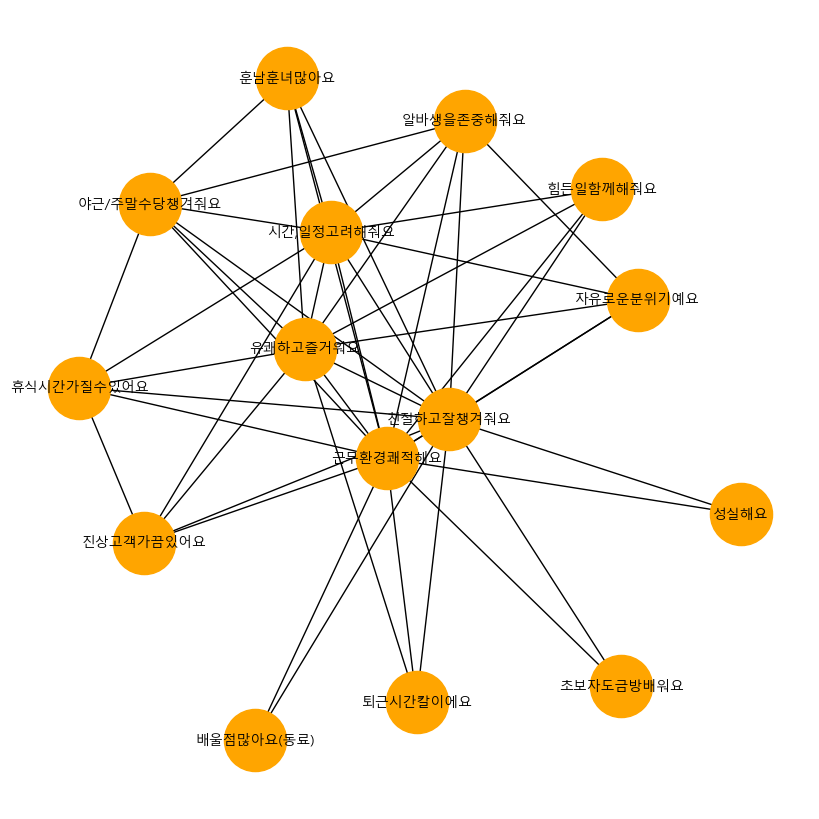

In [284]:
df1 =pd.DataFrame(list(support_1[support_1["length"]==2]['itemsets']), columns =["from","to"])
graph(df1)

### "할만해요" 연관규칙 시각화

In [285]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_2 = spt(tot_theater[tot_theater["recom"]=="할만해요"].iloc[:,14:53],0.15) 

support_2 = pd.DataFrame(support_2)
confidence_2 = association_rules(support_2, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_2.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,frozenset({'알바생을존중해줘요'}),frozenset({'친절하고잘챙겨줘요'}),0.200000,0.600000,0.150495,0.752475,1.254125,0.030495,1.616000,0.253289
3,frozenset({'자유로운분위기예요'}),frozenset({'친절하고잘챙겨줘요'}),0.233663,0.600000,0.154455,0.661017,1.101695,0.014257,1.180000,0.120453
8,frozenset({'근무환경쾌적해요'}),frozenset({'친절하고잘챙겨줘요'}),0.473267,0.600000,0.310891,0.656904,1.094840,0.026931,1.165854,0.164456
31,"frozenset({'시간,일정고려해줘요'})",frozenset({'친절하고잘챙겨줘요'}),0.344554,0.600000,0.213861,0.620690,1.034483,0.007129,1.054545,0.050856
25,frozenset({'가끔눈치보여요'}),frozenset({'친절하고잘챙겨줘요'}),0.297030,0.600000,0.180198,0.606667,1.011111,0.001980,1.016949,0.015632
22,frozenset({'진상고객가끔있어요'}),frozenset({'친절하고잘챙겨줘요'}),0.437624,0.600000,0.257426,0.588235,0.980392,-0.005149,0.971429,-0.034342
17,frozenset({'가끔눈치보여요'}),frozenset({'진상고객가끔있어요'}),0.297030,0.437624,0.174257,0.586667,1.340573,0.044270,1.360588,0.361396
15,frozenset({'야근/주말수당챙겨줘요'}),frozenset({'친절하고잘챙겨줘요'}),0.334653,0.600000,0.196040,0.585799,0.976331,-0.004752,0.965714,-0.035155
20,frozenset({'유쾌하고즐거워요'}),frozenset({'진상고객가끔있어요'}),0.380198,0.437624,0.215842,0.567708,1.297252,0.049458,1.300919,0.369698
11,frozenset({'야근/주말수당챙겨줘요'}),frozenset({'진상고객가끔있어요'}),0.334653,0.437624,0.180198,0.538462,1.230421,0.033746,1.218482,0.281463


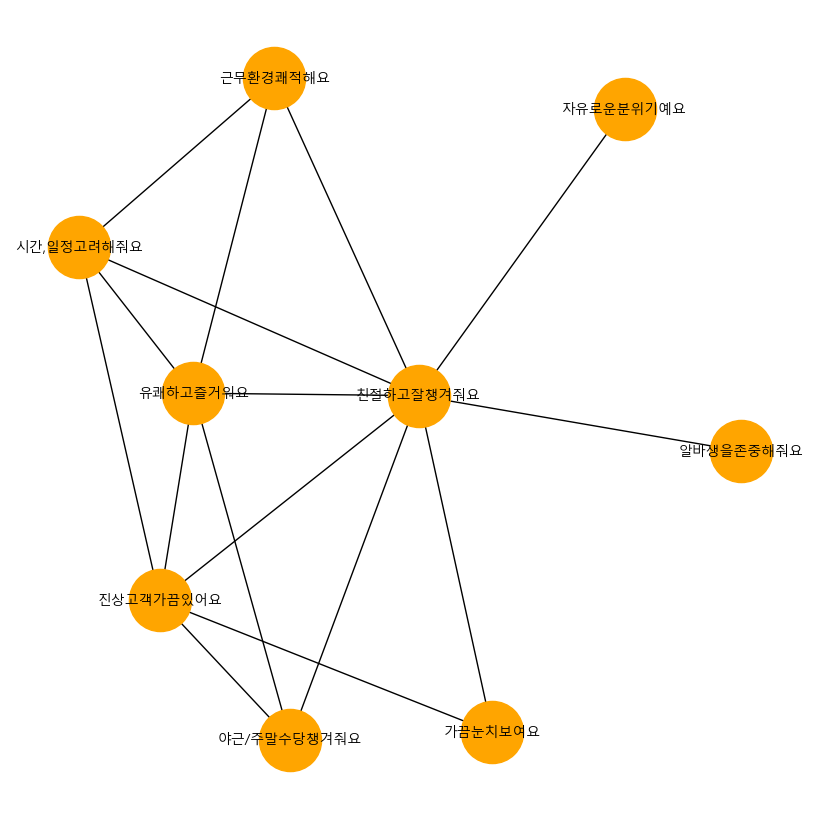

In [286]:
df2 =pd.DataFrame(list(support_2[support_2["length"]==2]['itemsets']), columns =["from","to"])
graph(df2)

### "글쎄요" 연관규칙 시각화

In [287]:
# 지지도 15프로 이상, 신뢰도 20프로 이상
support_3 = spt(tot_theater[tot_theater["recom"]=="글쎄요"].iloc[:,14:53],0.15) 

support_3 = pd.DataFrame(support_3)
confidence_3 = association_rules(support_3, metric = "confidence", min_threshold =0.2).sort_values(["confidence","support","lift"], ascending = [False, False, True])
confidence_3.iloc[:15,:].style.background_gradient(subset=["support","confidence","lift"],cmap = cm)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,"frozenset({'동료가자주바뀌어요', '가끔눈치보여요', '잔소리를좀해요'})",frozenset({'진상고객가끔있어요'}),0.151899,0.582278,0.151899,1.000000,1.717391,0.063451,inf,0.492537
64,"frozenset({'가끔눈치보여요', '잔소리를좀해요'})",frozenset({'진상고객가끔있어요'}),0.253165,0.582278,0.240506,0.950000,1.631522,0.093094,8.354430,0.518287
46,"frozenset({'동료가자주바뀌어요', '잔소리를좀해요'})",frozenset({'진상고객가끔있어요'}),0.177215,0.582278,0.164557,0.928571,1.594720,0.061368,5.848101,0.453254
16,"frozenset({'잔일도해요', '가끔눈치보여요'})",frozenset({'진상고객가끔있어요'}),0.164557,0.582278,0.151899,0.923077,1.585284,0.056081,5.430380,0.441919
1,"frozenset({'진상고객가끔있어요', '동료가자주바뀌어요', '잔소리를좀해요'})",frozenset({'가끔눈치보여요'}),0.164557,0.569620,0.151899,0.923077,1.620513,0.058164,5.594937,0.458333
20,"frozenset({'진상고객가끔있어요', '경직된분위기예요'})",frozenset({'가끔눈치보여요'}),0.202532,0.569620,0.177215,0.875000,1.536111,0.061849,3.443038,0.437642
63,"frozenset({'진상고객가끔있어요', '잔소리를좀해요'})",frozenset({'가끔눈치보여요'}),0.278481,0.569620,0.240506,0.863636,1.516162,0.081878,3.156118,0.471837
14,"frozenset({'진상고객가끔있어요', '잔일도해요'})",frozenset({'가끔눈치보여요'}),0.177215,0.569620,0.151899,0.857143,1.504762,0.050953,3.012658,0.407692
33,"frozenset({'동료가자주바뀌어요', '잔소리를좀해요'})",frozenset({'가끔눈치보여요'}),0.177215,0.569620,0.151899,0.857143,1.504762,0.050953,3.012658,0.407692
8,"frozenset({'동료가자주바뀌어요', '잔소리를좀해요'})","frozenset({'진상고객가끔있어요', '가끔눈치보여요'})",0.177215,0.392405,0.151899,0.857143,2.184332,0.082359,4.253165,0.658974


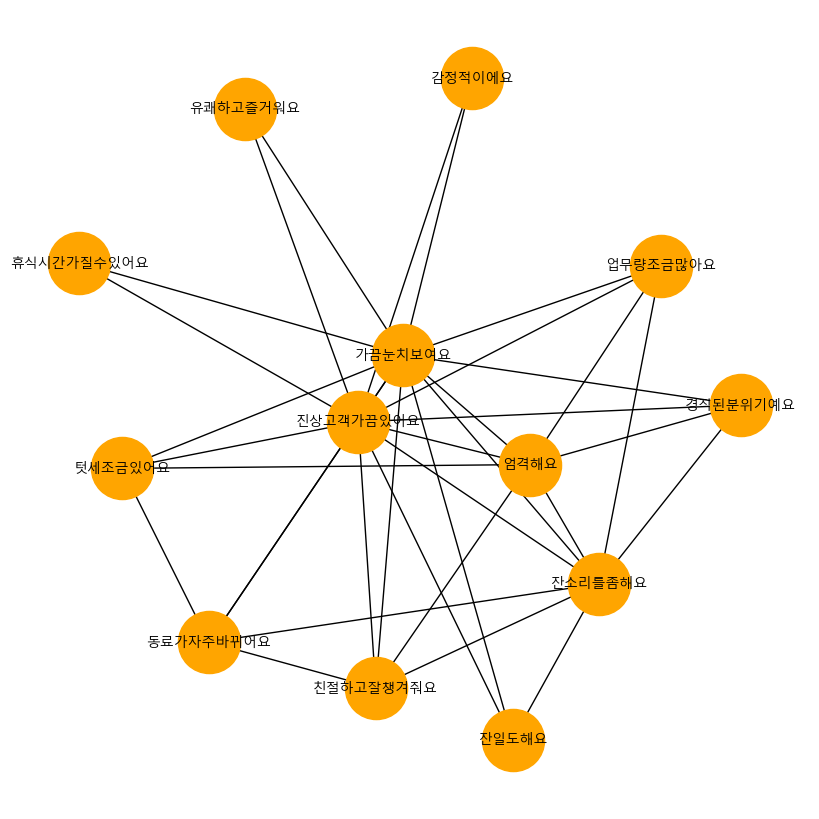

In [289]:
df3 =pd.DataFrame(list(support_3[support_3["length"]==2]['itemsets']), columns =["from","to"])
graph(df3)